In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

In [2]:
nifty_meta = pd.read_csv('C:\\Users\\Varun\\Downloads\\Nifty_Meta.csv')
nifty_meta.head(5)

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,Adani Enterprises Ltd.,METALS,ADANIENT,EQ,INE423A01024
2,Adani Green Energy Ltd.,POWER,ADANIGREEN,EQ,INE364U01010
3,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
4,Adani Transmission Ltd.,POWER,ADANITRANS,BE,INE931S01010


In [3]:
companies = list(nifty_meta[nifty_meta.Industry=='FINANCIAL SERVICES'].Symbol)
print(companies)
print(len(companies))

['AXISBANK', 'BAJFINANCE', 'BAJAJFINSV', 'BAJAJHLDNG', 'BANDHANBNK', 'BANKBARODA', 'CHOLAFIN', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HDFC', 'ICICIBANK', 'ICICIGI', 'ICICIPRULI', 'INDUSINDBK', 'KOTAKBANK', 'MUTHOOTFIN', 'PEL', 'PNB', 'SBICARD', 'SBILIFE', 'SBIN', 'YESBANK']
23


In [4]:
fromdate = datetime.datetime(2011, 6, 1)
todate = datetime.datetime(2021, 12, 29)

In [5]:
prices = pd.read_csv('C:\\Users\\varun\\Downloads\\Prices.csv', index_col=['company','date'], parse_dates=True)
prices.head(5)

open        high         low       close
company  date                                                      
AXISBANK 2011-01-06  256.450012  258.350006  253.039993  255.649994
         2011-02-06  251.020004  257.000000  251.020004  254.750000
         2011-03-06  254.399994  257.600006  244.800003  248.550003
         2011-06-06  248.399994  248.399994  241.630005  247.089996
         2011-07-06  245.399994  250.580002  244.949997  248.929993

In [6]:
min_obs = 2520
nobs = prices.groupby(level='company').size()
keep = nobs[nobs>min_obs].index

prices = prices.loc[idx[keep,:], :]
prices.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41712 entries, ('AXISBANK', Timestamp('2011-01-06 00:00:00')) to ('YESBANK', Timestamp('2021-12-29 00:00:00'))
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    41712 non-null  float64
 1   high    41712 non-null  float64
 2   low     41712 non-null  float64
 3   close   41712 non-null  float64
dtypes: float64(4)
memory usage: 1.5+ MB


In [7]:
companies = list(prices.index.get_level_values('company').unique())
print(len(companies))
print(companies)

16
['AXISBANK', 'BAJAJFINSV', 'BAJAJHLDNG', 'BAJFINANCE', 'BANKBARODA', 'CHOLAFIN', 'HDFC', 'HDFCBANK', 'ICICIBANK', 'INDUSINDBK', 'KOTAKBANK', 'MUTHOOTFIN', 'PEL', 'PNB', 'SBIN', 'YESBANK']


In [8]:
close = prices.unstack('company')['close'].sort_index()
close = close.dropna()
close.head(5)

company,AXISBANK,BAJAJFINSV,BAJAJHLDNG,BAJFINANCE,BANKBARODA,CHOLAFIN,HDFC,HDFCBANK,ICICIBANK,INDUSINDBK,KOTAKBANK,MUTHOOTFIN,PEL,PNB,SBIN,YESBANK
date,,,,,,,,,,,,,,,,
2011-06-06,247.089996,493.442047,766.599976,59.655087,170.580002,31.879999,670.650024,238.125000,192.372726,265.750000,221.449997,175.250000,360.038879,216.520004,231.714996,59.590000
2011-06-07,262.029999,509.750946,765.049988,60.864708,172.240005,32.090000,669.200012,237.649994,192.027267,267.250000,223.875000,174.300003,357.806854,218.649994,232.009995,59.880001
2011-06-09,228.089996,541.779236,763.700012,60.757832,175.889999,31.350000,654.799988,236.279999,190.545456,262.000000,219.774994,168.199997,355.914459,218.110001,226.354996,59.340000
2011-06-13,246.660004,540.993286,762.450012,60.718971,173.919998,31.100000,657.000000,237.259995,189.018188,261.649994,221.800003,167.399994,352.857513,217.160004,221.994995,58.849998
2011-06-14,252.009995,542.810852,766.599976,60.442070,173.059998,31.000000,648.400024,238.250000,191.918182,262.299988,223.975006,164.199997,358.340607,217.880005,223.024994,59.369999


In [9]:
train_close, test_close = train_test_split(close, test_size=0.5, shuffle=False)

In [10]:
train_close.head(5).append(train_close.tail(5))

company,AXISBANK,BAJAJFINSV,BAJAJHLDNG,BAJFINANCE,BANKBARODA,CHOLAFIN,HDFC,HDFCBANK,ICICIBANK,INDUSINDBK,KOTAKBANK,MUTHOOTFIN,PEL,PNB,SBIN,YESBANK
date,,,,,,,,,,,,,,,,
2011-06-06,247.089996,493.442047,766.599976,59.655087,170.580002,31.879999,670.650024,238.125000,192.372726,265.750000,221.449997,175.250000,360.038879,216.520004,231.714996,59.590000
2011-06-07,262.029999,509.750946,765.049988,60.864708,172.240005,32.090000,669.200012,237.649994,192.027267,267.250000,223.875000,174.300003,357.806854,218.649994,232.009995,59.880001
2011-06-09,228.089996,541.779236,763.700012,60.757832,175.889999,31.350000,654.799988,236.279999,190.545456,262.000000,219.774994,168.199997,355.914459,218.110001,226.354996,59.340000
2011-06-13,246.660004,540.993286,762.450012,60.718971,173.919998,31.100000,657.000000,237.259995,189.018188,261.649994,221.800003,167.399994,352.857513,217.160004,221.994995,58.849998
2011-06-14,252.009995,542.810852,766.599976,60.442070,173.059998,31.000000,648.400024,238.250000,191.918182,262.299988,223.975006,164.199997,358.340607,217.880005,223.024994,59.369999
2016-09-30,541.349976,3069.550049,1909.599976,1055.900024,167.399994,231.470001,1393.449951,636.424988,229.227264,1195.949951,777.000000,348.799988,1784.181885,140.699997,251.250000,250.940002
2016-10-03,413.000000,1687.849976,1938.199951,640.489990,168.899994,236.210007,1425.500000,643.599976,232.863632,1232.900024,788.049988,351.100006,1855.461914,143.350006,255.300003,254.050003
2016-10-05,487.950012,1858.800049,2130.399902,741.229980,169.449997,245.630005,1423.150024,643.049988,232.227264,1215.900024,782.150024,345.700012,1825.474854,144.300003,260.850006,255.830002
2016-10-06,541.049988,1812.150024,2094.750000,759.565002,164.500000,242.119995,1426.000000,640.974976,228.409088,1222.150024,783.000000,341.250000,1792.236694,141.949997,256.799988,256.010010


<function matplotlib.pyplot.savefig(*args, **kwargs)>

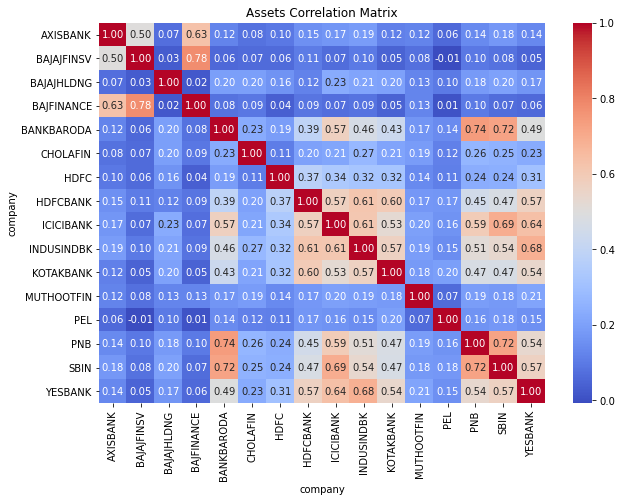

In [11]:
ig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.savefig

In [12]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('BAJAJHLDNG', 'HDFCBANK'), ('BANKBARODA', 'SBIN'), ('CHOLAFIN', 'YESBANK'), ('HDFCBANK', 'KOTAKBANK')]


<function matplotlib.pyplot.savefig(*args, **kwargs)>

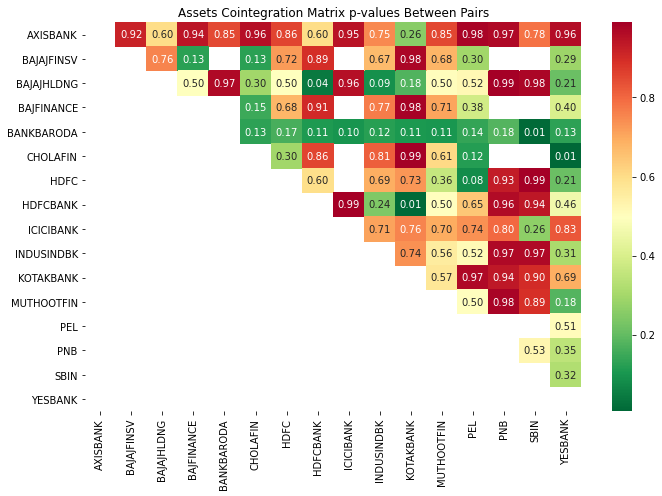

In [13]:
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.savefig

In [14]:
asset1 = 'BANKBARODA'
asset2 = 'SBIN'

In [15]:
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]

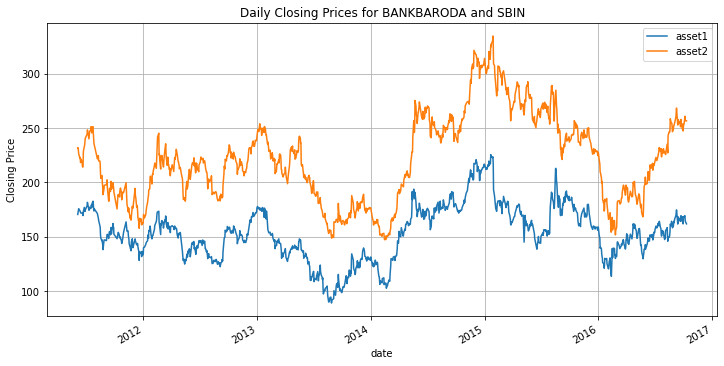

In [16]:
ax = train[['asset1','asset2']].plot(figsize=(12, 6), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
ax.grid(True);

In [17]:
model=sm.OLS(train.asset2, train.asset1).fit()

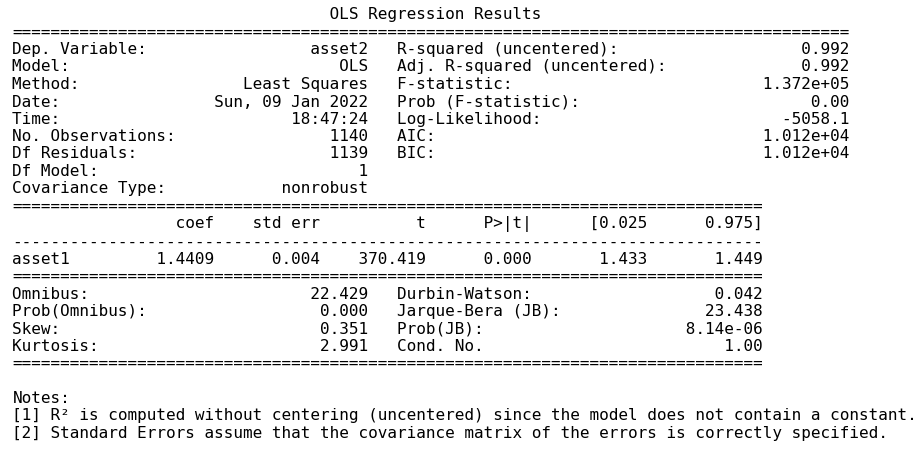

In [18]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)

In [19]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  1.440948094053379


In [20]:
spread = train.asset2 - model.params[0] * train.asset1

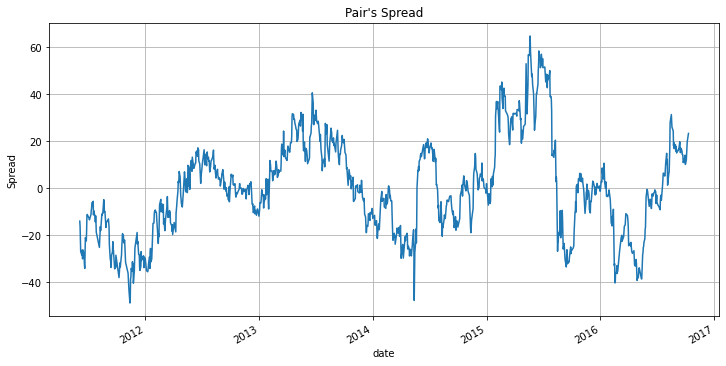

In [21]:
ax = spread.plot(figsize=(12, 6), title = "Pair's Spread")
ax.set_ylabel("Spread")
ax.grid(True);

In [22]:
adf = adfuller(spread, maxlag = 1)
print('Critical Value = ', adf[0])

Critical Value =  -3.414046439838418


In [23]:
print(adf)

(-3.414046439838418, 0.010489248464228726, 0, 1139, {'1%': -3.4361042569951805, '5%': -2.8640808675675826, '10%': -2.568122823703617}, 6481.1201284378985)


#The spread looks stationary and the critical value from the Augmented Dickey-Fuller test is -3.41 which is approximately equal to the value at 1% (-3.43) significance level. Hence, we are able to reject the null hypothesis that spread has a unit root and can conclude that it is stationarity in nature.

#It returns the following outputs
The p-value
The value of the test statistic
Number of lags considered for the test
The critical value cutoffs.

In [24]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [25]:
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2

In [26]:
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [27]:
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [28]:
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

In [29]:
signals.head(3).append(signals.tail(3))

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
date,,,,,,,,,
2016-10-13,154.250000,249.649994,1.550273,1.0,-1.0,-1,NaN,1,NaN
2016-10-14,153.949997,252.100006,1.502947,1.0,-1.0,-1,0.0,1,0.0
2016-10-17,150.949997,253.199997,1.407560,1.0,-1.0,-1,0.0,1,0.0
2021-12-27,79.849998,458.049988,-1.367255,1.0,-1.0,1,0.0,-1,0.0
2021-12-28,80.900002,461.200012,-1.360111,1.0,-1.0,1,0.0,-1,0.0
2021-12-29,80.949997,454.399994,-1.342120,1.0,-1.0,1,0.0,-1,0.0


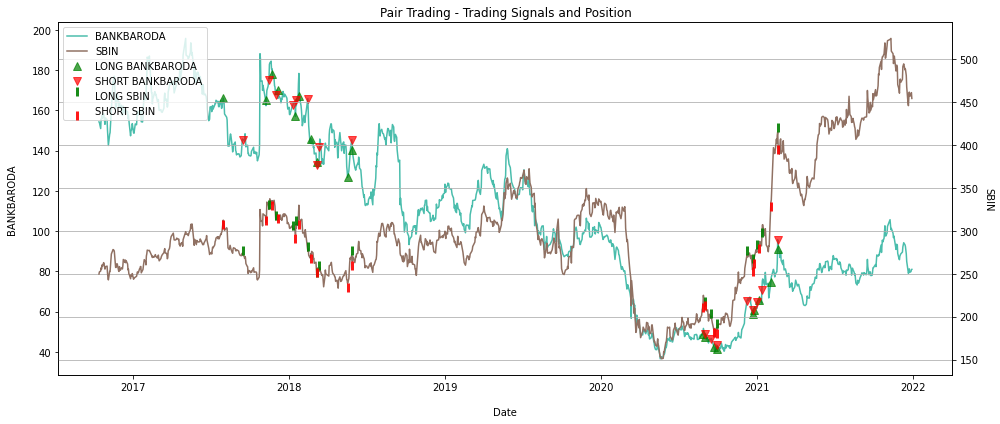

In [30]:
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

l1, = bx.plot(signals['asset1'], c='#4abdac')
l2, = bx2.plot(signals['asset2'], c='#907163')

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,marker='v',markersize=8, c='r',alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,marker=2,markersize=9, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,marker=3,markersize=9, c='r',alpha=0.9,markeredgewidth=3)

bx.set_ylabel(asset1,)
bx2.set_ylabel(asset2, rotation=270)
bx.yaxis.labelpad=15
bx2.yaxis.labelpad=15
bx.set_xlabel('Date')
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'LONG {}'.format(asset1),
           'SHORT {}'.format(asset1),
           'LONG {}'.format(asset2),
           'SHORT {}'.format(asset2)], loc ='best')

plt.title('Pair Trading - Trading Signals and Position')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()